# Prep data for training
1. Load & append members
2. Regrid: 
    a. z500 --> 2.5x2.5 
    b. precip --> 2.5x2.5 

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import datetime as dt

## LOAD DATA

In [3]:
zpath = '/glade/derecho/scratch/kjmayer/DATA/E3SMv2/Z500/'
ppath = '/glade/derecho/scratch/kjmayer/DATA/E3SMv2/PRECT/'
zfiname   = 'Z500_mem*_1950-2014_20-90N.nc'
pfiname = 'PRECT_mem*_1950-2014_20S-20N.nc'

z500 = xr.open_mfdataset(zpath+zfiname,
                          concat_dim = 'ens',
                          combine="nested",
                         )['Z500']

precip = xr.open_mfdataset(ppath+pfiname,
                            concat_dim = 'ens',
                            combine="nested",
                            )['PRECT']

## Regrid Data

In [9]:
# ----- regrid z500 to 2.5x2.5 (bilinear interpolation) -----
# 1.25 x .9424
z500_regrid = z500.interp(lat = np.arange(20,92.5,2.5),
                            lon = np.arange(0,360.,2.5),
                            method = 'linear')  

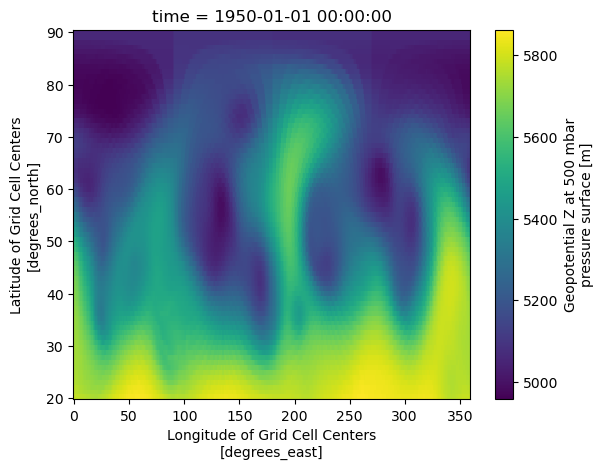

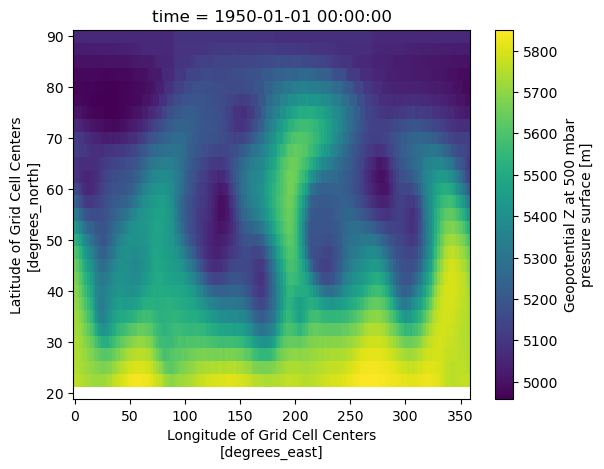

In [15]:
z500[0,0].plot()
plt.show()
z500_regrid[0,0].plot()
plt.show()

In [12]:
# ----- regrid precip to 2.5x2.5 (bilinear interpolation) & 20S-20N = lower res to use less memory -----
# 1.25 x .9424
precip_regrid = precip.interp(lat = np.arange(-20,20.5,2.5),
                              lon = np.arange(0,360.0,2.5),
                              method = 'linear')  

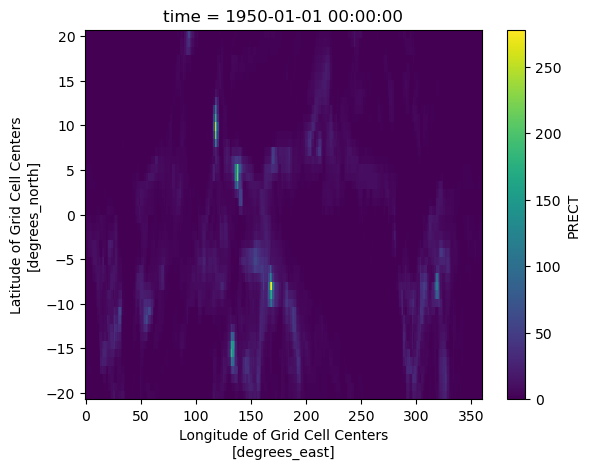

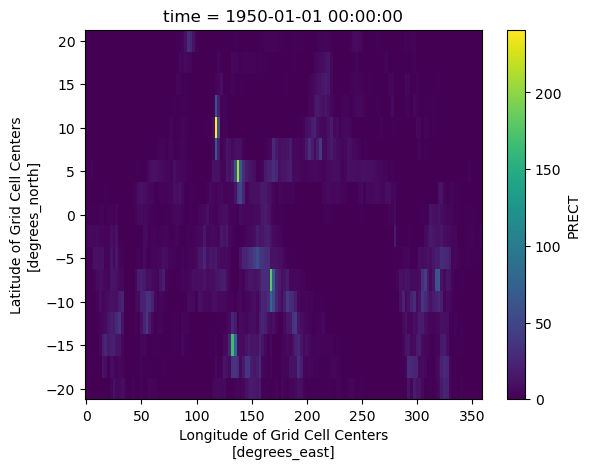

In [14]:
precip[0,0].plot()
plt.show()
precip_regrid[0,0].plot()
plt.show()

In [16]:
del precip
del z500

## Save Combined & Regridded Data

In [17]:
# save cesm files one at a time
precip_regrid.to_netcdf(ppath+'PRECT_allmem_1950-2014_20S-20N_regrid2.5x2.5.nc')
z500_regrid.to_netcdf(zpath+'Z500_allmem_1950-2014_20-90N_regrid2.5x2.5.nc')